<center>
    <hr> 
    <h1> 1º algoritimo: Aglomeração K-means </h1>
    <br>
    <I> Feito por Yasmin Miranda, nos dias 17/05/2022 18/06/2022 </I>
    <hr> 
</center>

<center>
    <font size = "4" color = "#003666"> <B> Importando bibliotecas necessárias: </B> </font> 
</center>

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() #estilo de todos os gráficos para sns
from sklearn.cluster import KMeans
import os #interagir com sistema operacional

<center> 
    <font size = "4" color = "#003666"> <B> Checando endereço do diretório: </B> </font> 
</center>

In [2]:
os.getcwd()

'C:\\Users\\yasmi\\Documents\\Arquivos no Jupyter Notebook'

<center>
<font size = "4" color = "#003666"> <B> Lendo, editando e visualizando a base de dados: </B> </font> 
</center>

In [3]:
exemplo1 = pd.read_csv("country-kmeans1.csv")
exemplo1

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


In [4]:
exemplo1.columns = ["País", "Latitude", "Longitude", "Língua"]
exemplo1.replace(["English", "French", "German"],["Inglês", "Francês", "Alemão"], inplace = True)
exemplo1.iloc[[0,1,2,3,4,5],[0]] = ["EUA","Canada","França", "Reino Unido", "Alemanha","Australia"]
exemplo1

,País,Latitude,Longitude,Língua
0,EUA,44.97,-103.77,Inglês
1,Canada,62.40,-96.80,Inglês
2,França,46.75,2.40,Francês
3,Reino Unido,54.01,-2.53,Inglês
4,Alemanha,51.15,10.40,Alemão
5,Australia,-25.45,133.11,Inglês


<left>
    <font size = "2" color = "#007fae"> <B> Obs: </B> </font> <font size = "2"> Maneiras adicionais de alterar uma base de dados  </font> 
    <br>
    <br>
    <font size ="2">
dataframe.loc[row index,['column-names']] = value<br>
dataframe.at[index,'column-name']='new value'
    </font>
</left>


<center>
<font size = "4" color = "#003666"> <B> Análise Descritiva: </B> </font> 
</center>

In [5]:
exemplo1.describe()

,Latitude,Longitude
count,6.000000,6.000000
mean,38.971667,-9.531667
std,32.155820,86.523904
min,-25.450000,-103.770000
25%,45.415000,-73.232500
50%,48.950000,-0.065000
75%,53.295000,8.400000
max,62.400000,133.110000


In [6]:
qtd_lingua = np.unique(exemplo1['Língua'], return_counts=True);qtd_lingua

(array(['Alemão', 'Francês', 'Inglês'], dtype=object),
 array([1, 1, 4], dtype=int64))

<BarContainer object of 6 artists>

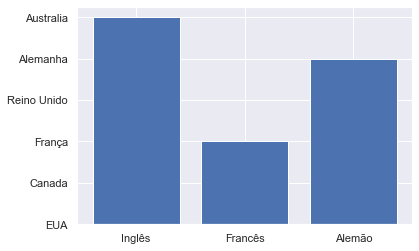

In [7]:
plt.bar(exemplo1['Língua'],exemplo1['País'])

Estudo de pandas para analise de dados

In [8]:
import pandas as pd

In [9]:
s1 = pd.Series(['a','b','c','d'], index = [1,2,3,4], name='Series1') #colunas

In [10]:
s2 = pd.Series(['a','b','c','d'], name='Series2')
pd.DataFrame(s1)

,Series1
1,a
2,b
3,c
4,d


head
tail
index
column
descrive
transpose

In [11]:
boston = pd.read_csv('Boston.csv')
#boston.to_csv('boston1.csv')
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


<center>
<font size = "4" color = "#003666"> <B> K-Means: </B> </font> 
</center>

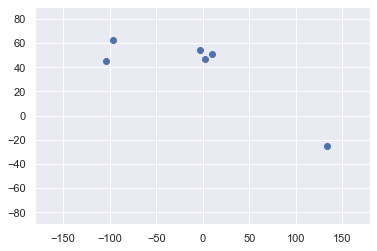

In [12]:
plt.scatter(exemplo1["Longitude"],exemplo1['Latitude'])
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

In [13]:
x = exemplo1.iloc[:,1:3]
x

,Latitude,Longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40
5,-25.45,133.11


In [14]:
kmeans = KMeans(2)
kmeans.fit(x) #ajuste, atuando como regressor (isso implica em tal coisa) em outros casos pode ser classificador

KMeans(n_clusters=2)

In [15]:
clusteres_identificados = kmeans.fit_predict(x)
clusteres_identificados

array([1, 1, 1, 1, 1, 0])

In [16]:
dados_cc = exemplo1.copy()
dados_cc['Clusteres']= clusteres_identificados
dados_cc

,País,Latitude,Longitude,Língua,Clusteres
0,EUA,44.97,-103.77,Inglês,1
1,Canada,62.40,-96.80,Inglês,1
2,França,46.75,2.40,Francês,1
3,Reino Unido,54.01,-2.53,Inglês,1
4,Alemanha,51.15,10.40,Alemão,1
5,Australia,-25.45,133.11,Inglês,0


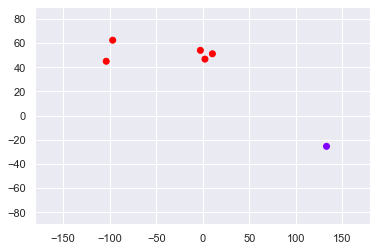

In [17]:
plt.scatter(dados_cc['Longitude'], dados_cc['Latitude'], c=dados_cc['Clusteres'], cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

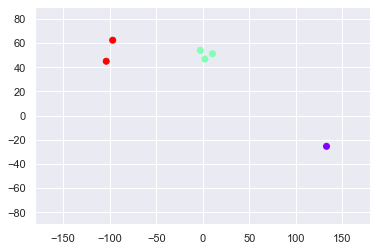

In [18]:
kmeans2 = KMeans(3)
kmeans2.fit(x)
clusteres_identificados2 = kmeans2.fit_predict(x)
clusteres_identificados2
dados_cc2 = exemplo1.copy()
dados_cc2['Clusteres']= clusteres_identificados2
plt.scatter(dados_cc2['Longitude'], dados_cc2['Latitude'], c=dados_cc2['Clusteres'], cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()